# Prediction Expected LifeTime Of Satelites

This NoteBook Covers the LifeTime of Satelites with some **Data Analysis** and Some **Visualization**.

For more [Refer](https://www.kaggle.com/code/rubenb1234/predicting-expected-lifetime-of-satellites/data)

### Importing Libraries and Data Cleaning

First we import all the required Libraries after which we will get data from the [database.csv](https://www.kaggle.com/code/rubenb1234/predicting-expected-lifetime-of-satellites/data).

There will be usually some null and dirty data. So as a prilimary step lets clean up some data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
colnames = ["Name","Country","Operator","OperatorCountry","Users","Purpose","PurposeDetail","OrbitClass","OrbitType",
           "OrbitLong","Perigree","Apogee","Eccentricity","Inclination","Period","LaunchMass","DryMass","Power",
            "LaunchDate","ExpLifetime","Contractor","ContractorCountry","LaunchSite","LaunchVehicle","COSPAR","NORAD"]
sat = pd.read_csv("data/database.csv",names = colnames,header=0)
sat.head(10)

,Name,Country,Operator,OperatorCountry,Users,Purpose,PurposeDetail,OrbitClass,OrbitType,OrbitLong,...,DryMass,Power,LaunchDate,ExpLifetime,Contractor,ContractorCountry,LaunchSite,LaunchVehicle,COSPAR,NORAD
0,AAUSat-4,NR,University of Aalborg,Denmark,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.00,...,NaN,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460.0
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,16000,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,NaN,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0
3,ABS-3,Philippines,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,...,1800,9000,8/19/1997,15,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901.0
4,ABS-3A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,NaN,3/2/2015,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0
5,ABS-4,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,1700,7400,3/13/2004,12,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184.0
6,ABS-6,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,159.00,...,1730,"6,800 (EOL)",9/26/1999,15,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924.0
7,ABS-7,South Korea,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,116.18,...,1800,4800,9/4/1999,15,Lockheed Martin Astro Space,USA,Guiana Space Center,Ariane,1999-046A,25894.0
8,USA 139,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,-14.50,...,NaN,NaN,5/9/1998,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336.0
9,USA 171,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,95.40,...,NaN,NaN,9/9/2003,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937.0


In [5]:
#Remove records with too many NaN values
droprow = [796]
sat = sat.drop(droprow)
sat = sat.reset_index(drop=True)

In [6]:
sat.head(10)

,Name,Country,Operator,OperatorCountry,Users,Purpose,PurposeDetail,OrbitClass,OrbitType,OrbitLong,...,DryMass,Power,LaunchDate,ExpLifetime,Contractor,ContractorCountry,LaunchSite,LaunchVehicle,COSPAR,NORAD
0,AAUSat-4,NR,University of Aalborg,Denmark,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.00,...,NaN,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460.0
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,16000,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,NaN,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0
3,ABS-3,Philippines,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,...,1800,9000,8/19/1997,15,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901.0
4,ABS-3A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,NaN,3/2/2015,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0
5,ABS-4,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,1700,7400,3/13/2004,12,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184.0
6,ABS-6,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,159.00,...,1730,"6,800 (EOL)",9/26/1999,15,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924.0
7,ABS-7,South Korea,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,116.18,...,1800,4800,9/4/1999,15,Lockheed Martin Astro Space,USA,Guiana Space Center,Ariane,1999-046A,25894.0
8,USA 139,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,-14.50,...,NaN,NaN,5/9/1998,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336.0
9,USA 171,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,95.40,...,NaN,NaN,9/9/2003,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937.0


In [7]:
sat.shape

(1419, 26)

In [8]:
sat.dtypes

Name                  object
Country               object
Operator              object
OperatorCountry       object
Users                 object
Purpose               object
PurposeDetail         object
OrbitClass            object
OrbitType             object
OrbitLong            float64
Perigree             float64
Apogee               float64
Eccentricity         float64
Inclination          float64
Period                object
LaunchMass            object
DryMass               object
Power                 object
LaunchDate            object
ExpLifetime           object
Contractor            object
ContractorCountry     object
LaunchSite            object
LaunchVehicle         object
COSPAR                object
NORAD                float64
dtype: object

### Univariate data analysis and Visualization
Next we investigate the different variables in our dataset on their own. The goal of this exercise is to identify any variables with a significant number of missing values, and to identify variables that are heavily skewed.

In [9]:
sat.Name.describe()

count        1419
unique       1414
top       USA 264
freq            2
Name: Name, dtype: object

In [12]:
name_counts = sat['Name'].value_counts()
name_counts[name_counts == 2]

USA 264    2
USA 181    2
USA 194    2
USA 229    2
USA 238    2
Name: Name, dtype: int64

In [13]:
sat.Country.describe()

count     1419
unique      47
top        USA
freq       423
Name: Country, dtype: object

In [14]:
sat.Country.value_counts()

USA                     423
NR                      393
Russia                  126
China                   112
France                   66
Japan                    49
United Kingdom           41
India                    29
Germany                  22
Luxembourg               19
ESA                      16
Canada                   15
Saudi Arabia             11
Brazil                   11
South Korea              10
Australia                 6
EUMETSAT                  6
Italy                     6
United Arab Emirates      6
Norway                    6
Spain                     4
Indonesia                 4
Malaysia                  4
Argentina                 3
Turkey                    3
Mexico                    3
Belgium                   2
Sweden                    2
Nigeria                   2
Germany/USA               2
Bolivia                   1
Venezuela/China           1
Iraq                      1
Thailand                  1
Venezuela                 1
Chile               

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

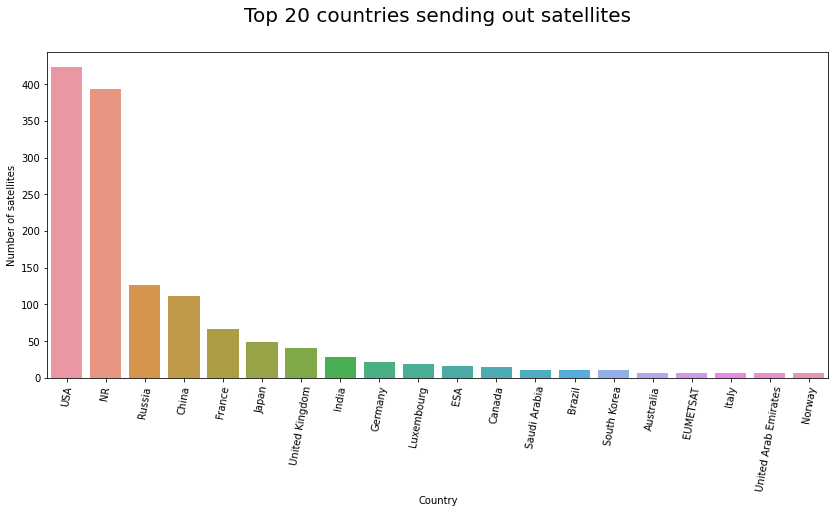

In [15]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(sat['Country'], order = sat.Country.value_counts().iloc[:20].index)
plt.xticks(rotation=80)
plt.title("Top 20 countries sending out satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Country")
plt.ylabel("Number of satellites")

In [16]:
sat.Operator.describe()

count                    1419
unique                    390
top       Ministry of Defense
freq                       86
Name: Operator, dtype: object

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

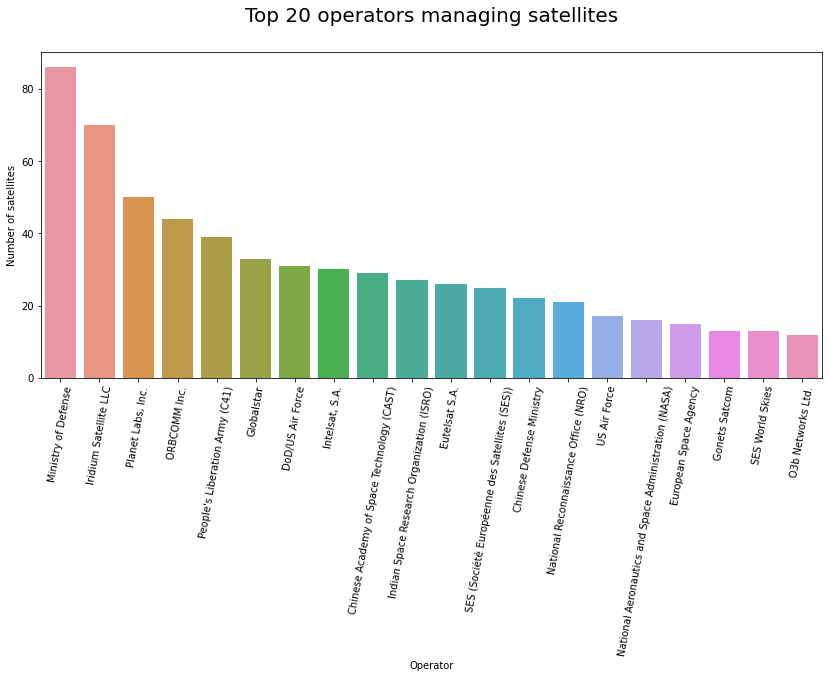

In [17]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(sat['Operator'], order = sat.Operator.value_counts().iloc[:20].index)
plt.xticks(rotation=80)
plt.title("Top 20 operators managing satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Operator")
plt.ylabel("Number of satellites")

In [18]:
sat.OperatorCountry.describe()

count     1419
unique      82
top        USA
freq       561
Name: OperatorCountry, dtype: object

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

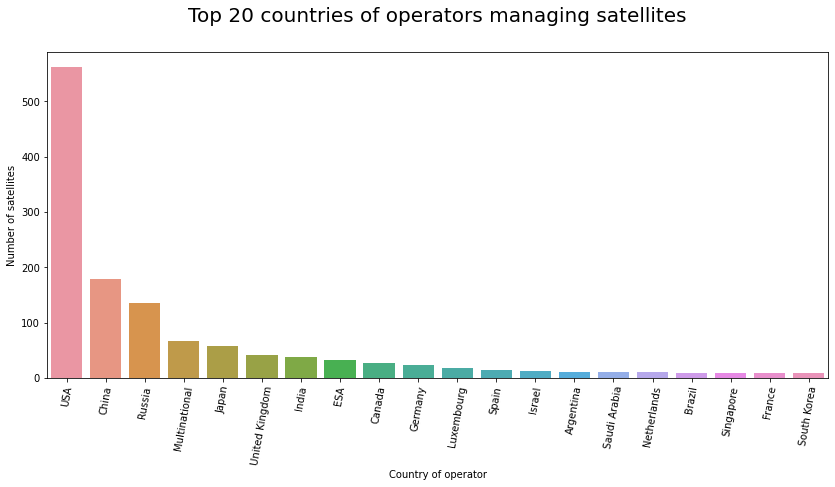

In [19]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(sat['OperatorCountry'], order = sat.OperatorCountry.value_counts().iloc[:20].index)
plt.xticks(rotation=80)
plt.title("Top 20 countries of operators managing satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Country of operator")
plt.ylabel("Number of satellites")

In [20]:
sat.Users.describe()

count           1419
unique            15
top       Commercial
freq             557
Name: Users, dtype: object

In [22]:
#Clean up 'Users' data
for i in sat.index:
    if sat.loc[i,'Users'] == 'Commercial/Government':
        sat.loc[i,'Users'] = 'Government/Commercial'
    if sat.loc[i,'Users'] == 'Military/Government':
        sat.loc[i,'Users'] = 'Government/Military'
    if sat.loc[i,'Users'] == 'Commerical':
        sat.loc[i,'Users'] = 'Commercial'
    if sat.loc[i,'Users'] == 'Civil/Government':
        sat.loc[i,'Users'] = 'Government/Civil'
    if sat.loc[i,'Users'] == 'Military ':
        sat.loc[i,'Users'] = 'Military'

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

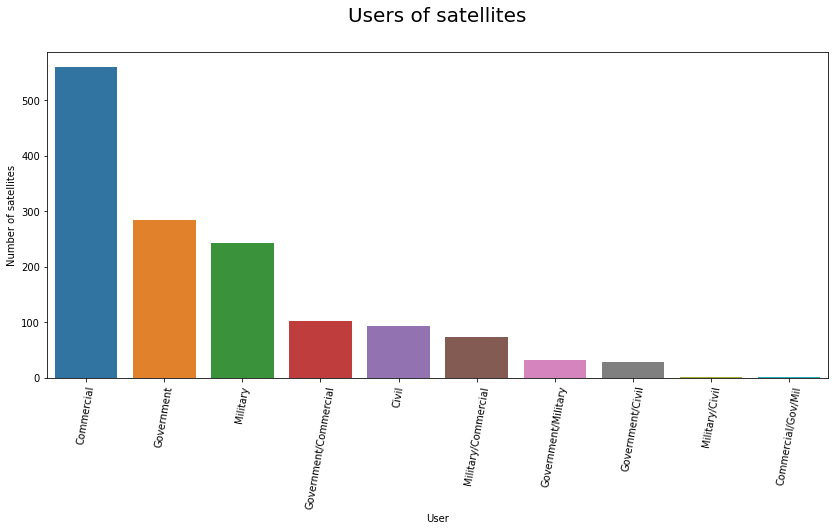

In [23]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(sat['Users'], order = sat.Users.value_counts().index)
plt.xticks(rotation=80)
plt.title("Users of satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("User")
plt.ylabel("Number of satellites")

In [29]:
sat.Purpose.describe()

count               1419
unique                17
top       Communications
freq                 699
Name: Purpose, dtype: object

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

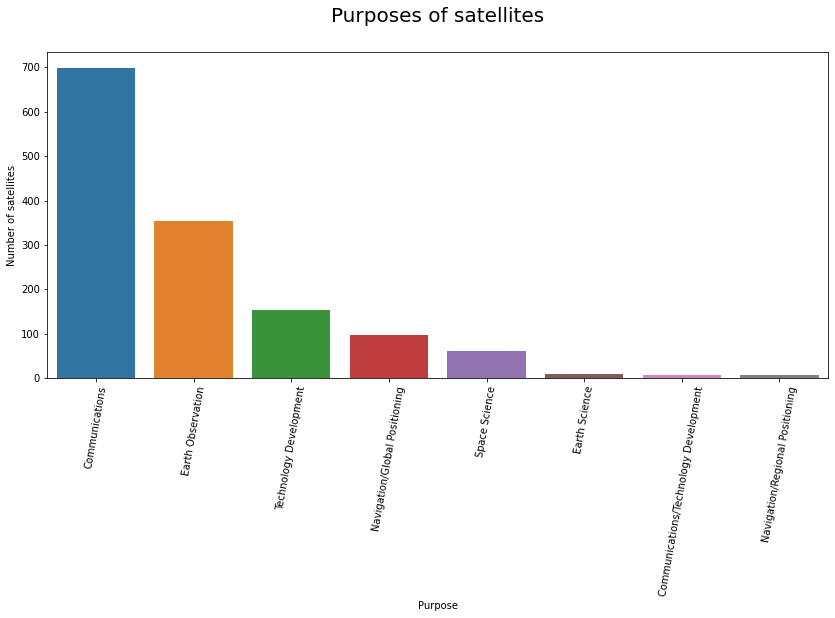

In [30]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(sat['Purpose'], order = sat.Purpose.value_counts().iloc[:8].index)
plt.xticks(rotation=80)
plt.title("Purposes of satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Purpose")
plt.ylabel("Number of satellites")

In [31]:
sat.PurposeDetail.describe()

count                 369
unique                 20
top       Optical Imaging
freq                  158
Name: PurposeDetail, dtype: object

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

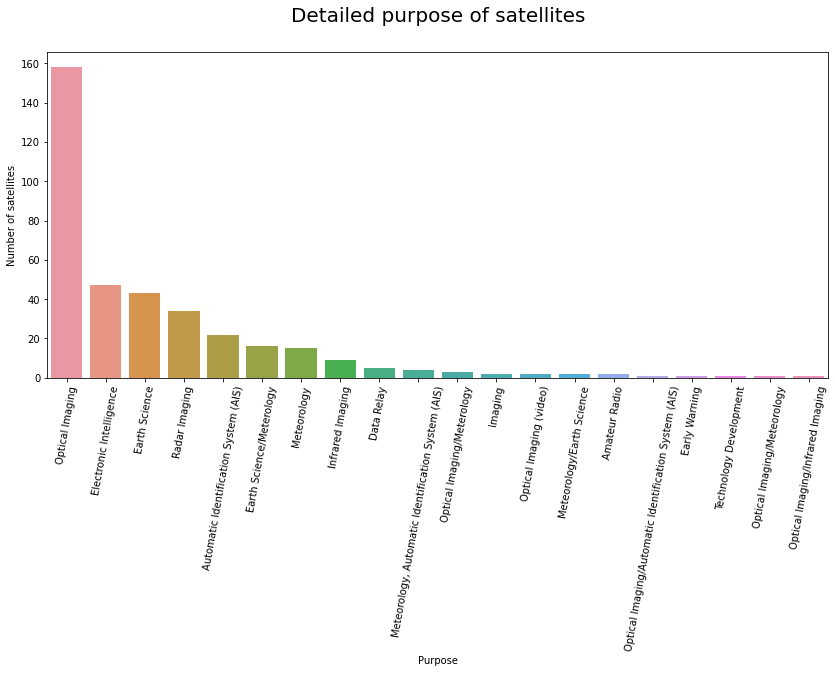

In [32]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(sat['PurposeDetail'], order = sat.PurposeDetail.value_counts().index)
plt.xticks(rotation=80)
plt.title("Detailed purpose of satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Purpose")
plt.ylabel("Number of satellites")


In [33]:
sat.OrbitClass.describe()

count     1419
unique       5
top        LEO
freq       779
Name: OrbitClass, dtype: object

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

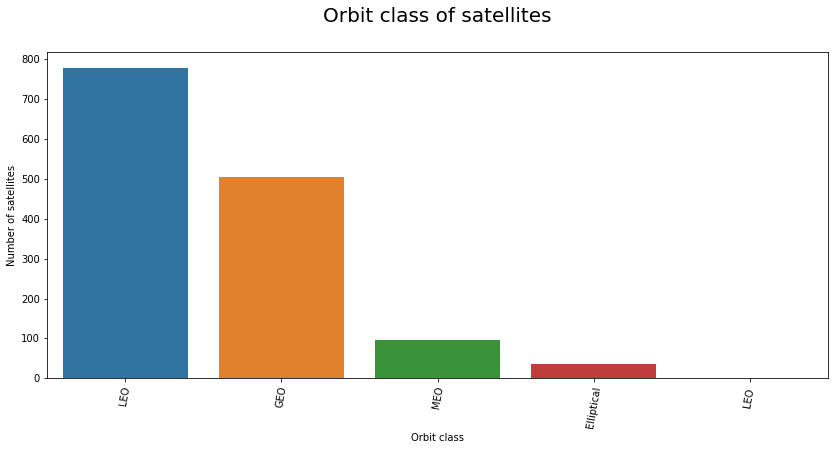

In [34]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(sat['OrbitClass'], order = sat.OrbitClass.value_counts().index)
plt.xticks(rotation=80)
plt.title("Orbit class of satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Orbit class")
plt.ylabel("Number of satellites")

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

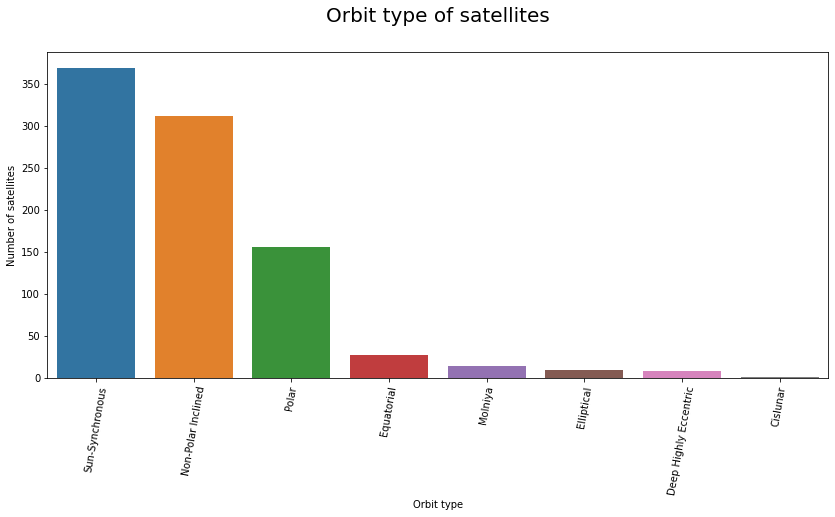

In [35]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(sat['OrbitType'], order = sat.OrbitType.value_counts().index)
plt.xticks(rotation=80)
plt.title("Orbit type of satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Orbit type")
plt.ylabel("Number of satellites")

Text(0, 0.5, 'Orbit Longitude')

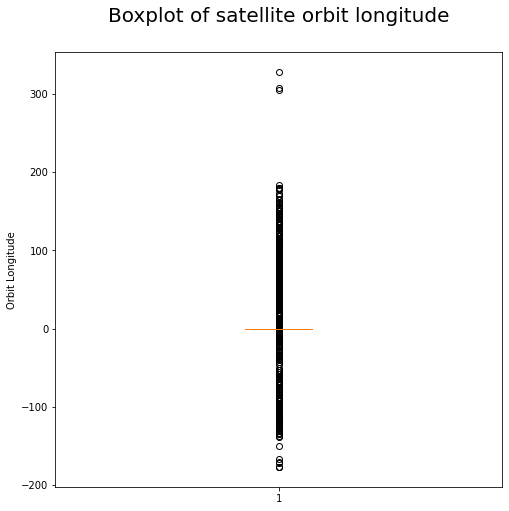

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
plt.boxplot(sat[sat['OrbitLong'].notnull()].OrbitLong)
plt.title("Boxplot of satellite orbit longitude", fontdict = {'fontsize':20}, pad = 30.0)
plt.ylabel("Orbit Longitude")

#The boxplot reveals that the large majority of satellites have an Orbit Longitude of 0 degrees in the dataset.
#This is likely because a 0 is used to mark the Orbit Longitude for satellites that are not geosynchroneous.

Text(0.5, 0, 'Orbit Longitude')

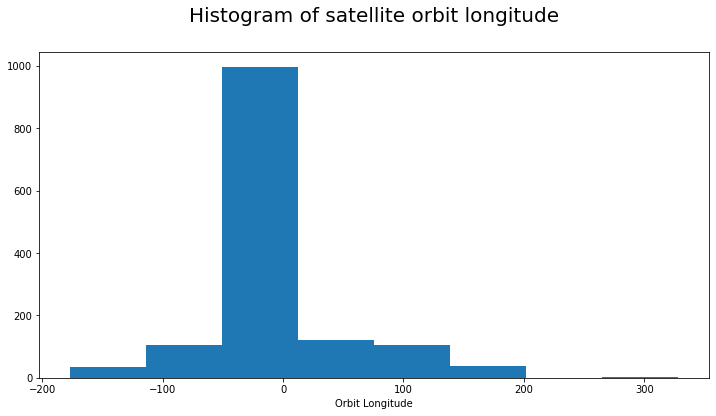

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
plt.hist(sat['OrbitLong'].dropna(), bins = 8)
plt.title("Histogram of satellite orbit longitude", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Orbit Longitude")

Text(0.5, 0, 'Perigree')

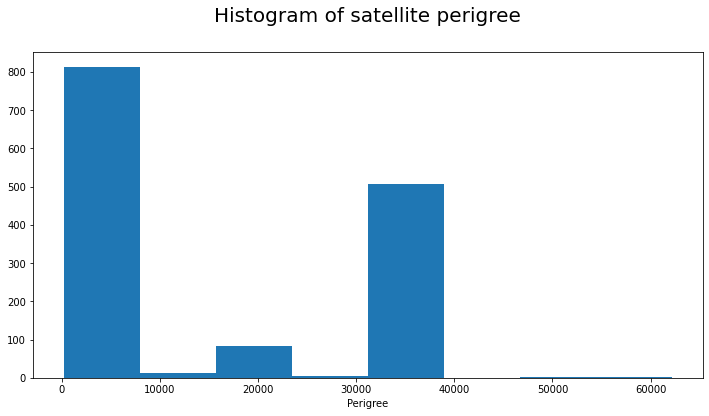

In [38]:
fig, ax = plt.subplots(figsize=(12,6))
plt.hist(sat['Perigree'].dropna(), bins = 8)
plt.title("Histogram of satellite perigree", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Perigree")

Text(0, 0.5, 'Apogee')

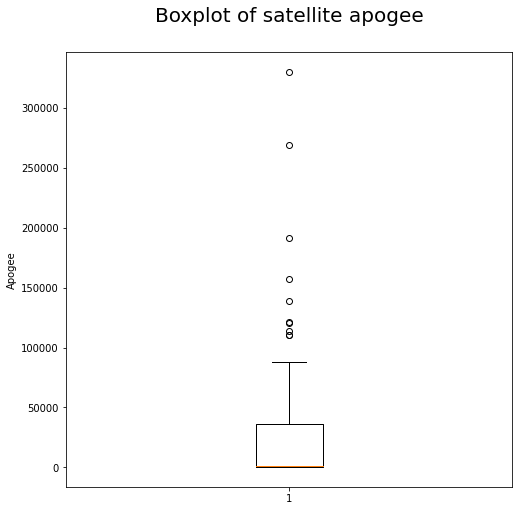

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
plt.boxplot(sat[sat['Apogee'].notnull()].Apogee)
plt.title("Boxplot of satellite apogee", fontdict = {'fontsize':20}, pad = 30.0)
plt.ylabel("Apogee")

Text(0.5, 0, 'Apogee')

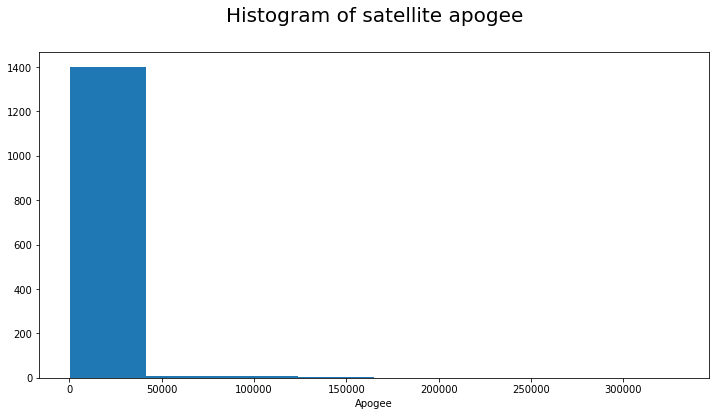

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
plt.hist(sat['Apogee'].dropna(), bins = 8)
plt.title("Histogram of satellite apogee", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Apogee")

In [42]:
sat.LaunchDate.describe()

count          1416
unique          812
top       6/19/2014
freq             33
Name: LaunchDate, dtype: object

In [43]:
sat.LaunchDate = pd.to_datetime(sat.LaunchDate)

In [44]:
sat.LaunchDate.describe()

C:\Users\aniru\AppData\Local\Temp/ipykernel_16484/3449296404.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sat.LaunchDate.describe()


count                    1416
unique                    812
top       2014-06-19 00:00:00
freq                       33
first     1974-11-15 00:00:00
last      2016-06-29 00:00:00
Name: LaunchDate, dtype: object

In [45]:
sat[sat['LaunchDate'].isnull()]

,Name,Country,Operator,OperatorCountry,Users,Purpose,PurposeDetail,OrbitClass,OrbitType,OrbitLong,...,Contractor,ContractorCountry,LaunchSite,LaunchVehicle,COSPAR,NORAD,Civil,Commercial,Military,Government
1186,SNaP-3 Eddie,NR,US Army Space and Missile Defense Command,USA,Military,Technology Development,NaN,LEO,Non-Polar Inclined,0.0,...,US Army Space and Missile Defense Command,USA,Cape Canaveral,Atlas 5,2015-058J,40972.0,0,0,0,0
1187,SNaP-3 Jimi,NR,US Army Space and Missile Defense Command,USA,Military,Technology Development,NaN,LEO,Non-Polar Inclined,0.0,...,US Army Space and Missile Defense Command,USA,Cape Canaveral,Atlas 5,2015-058M,40975.0,0,0,0,0
1239,TacSat 6,NR,Operational Responsive Space (ORS) Office,USA,Military,Technology Development,NaN,LEO,Polar,0.0,...,Air Force Research Laboratory (AFRL),USA,Vandenberg AFB,Atlas 5,2013-072M,39473.0,0,0,0,0


In [46]:
sat['LaunchYear'] = sat['LaunchDate'].dt.year
sat.LaunchYear.describe()


count    1416.000000
mean     2008.489407
std         6.332475
min      1974.000000
25%      2004.000000
50%      2010.000000
75%      2014.000000
max      2016.000000
Name: LaunchYear, dtype: float64

In [47]:
sat.dtypes

Name                         object
Country                      object
Operator                     object
OperatorCountry              object
Users                        object
Purpose                      object
PurposeDetail                object
OrbitClass                   object
OrbitType                    object
OrbitLong                   float64
Perigree                    float64
Apogee                      float64
Eccentricity                float64
Inclination                 float64
Period                       object
LaunchMass                   object
DryMass                      object
Power                        object
LaunchDate           datetime64[ns]
ExpLifetime                  object
Contractor                   object
ContractorCountry            object
LaunchSite                   object
LaunchVehicle                object
COSPAR                       object
NORAD                       float64
Civil                         int64
Commercial                  

Text(0.5, 0, 'Year')

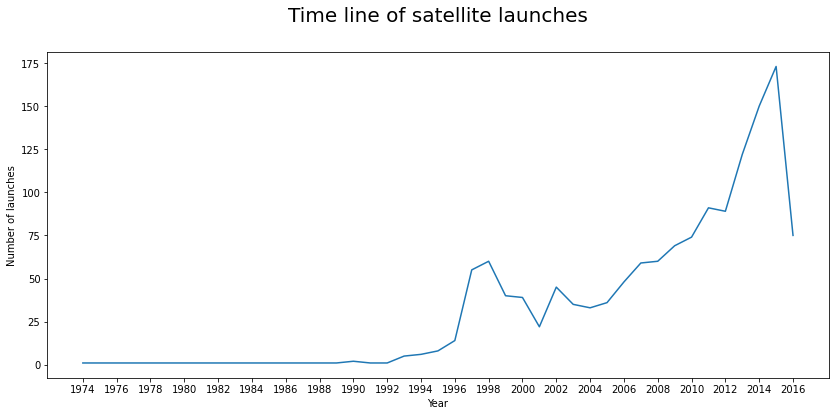

In [48]:
fig, ax = plt.subplots(figsize=(14,6))
sat[sat['LaunchYear'].notnull()].LaunchYear.groupby(sat['LaunchYear']).count().plot()
plt.xticks(np.arange(1974,2017,step=2))
plt.title("Time line of satellite launches", fontdict = {'fontsize':20}, pad = 30.0)
plt.ylabel("Number of launches")
plt.xlabel("Year")

In [49]:
sat.ExpLifetime.describe()

count     976
unique     45
top        15
freq      279
Name: ExpLifetime, dtype: object

In [50]:
#Clean up ExpLifetime data
for i in sat.index:
    if isinstance(sat.loc[i,'ExpLifetime'], str):
        sat.loc[i,'ExpLifetime'] = sat.loc[i,'ExpLifetime'].strip(" yr.")
        sat.loc[i,'ExpLifetime'] = sat.loc[i,'ExpLifetime'].strip("yrs.")
        sat.loc[i,'ExpLifetime'] = sat.loc[i,'ExpLifetime'].strip(" trs,")
        sat.loc[i,'ExpLifetime'] = sat.loc[i,'ExpLifetime'].strip(" hrs.")
        if "-" in sat.loc[i,'ExpLifetime']:
            sat.loc[i,'ExpLifetime'] = (float(sat.loc[i,'ExpLifetime'].split("-")[0]) + 
                                        float(sat.loc[i,'ExpLifetime'].split("-")[1])) / 2
            
sat.ExpLifetime = pd.to_numeric(sat.ExpLifetime)

Text(0.5, 0, 'Expected lifetime (in years)')

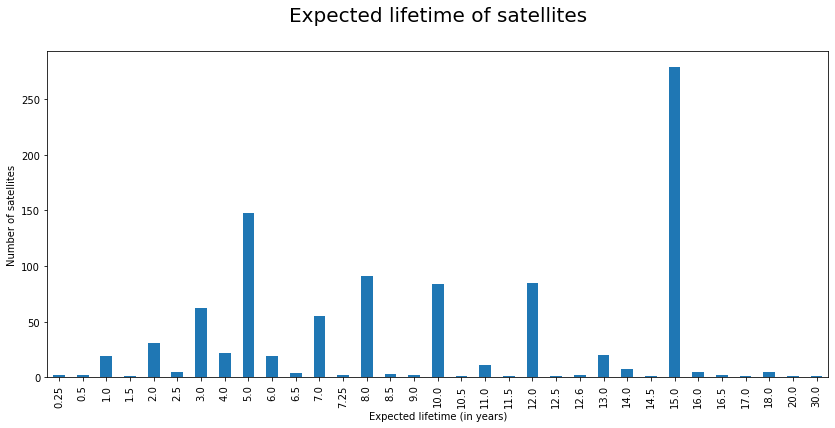

In [51]:
fig, ax = plt.subplots(figsize=(14,6))
sat[sat['ExpLifetime'].notnull()].ExpLifetime.groupby(sat['ExpLifetime']).count().plot(kind="bar")
plt.title("Expected lifetime of satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.ylabel("Number of satellites")
plt.xlabel("Expected lifetime (in years)")

In [52]:
sat.Contractor.describe()

count                    1419
unique                    319
top       Space Systems/Loral
freq                       93
Name: Contractor, dtype: object

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

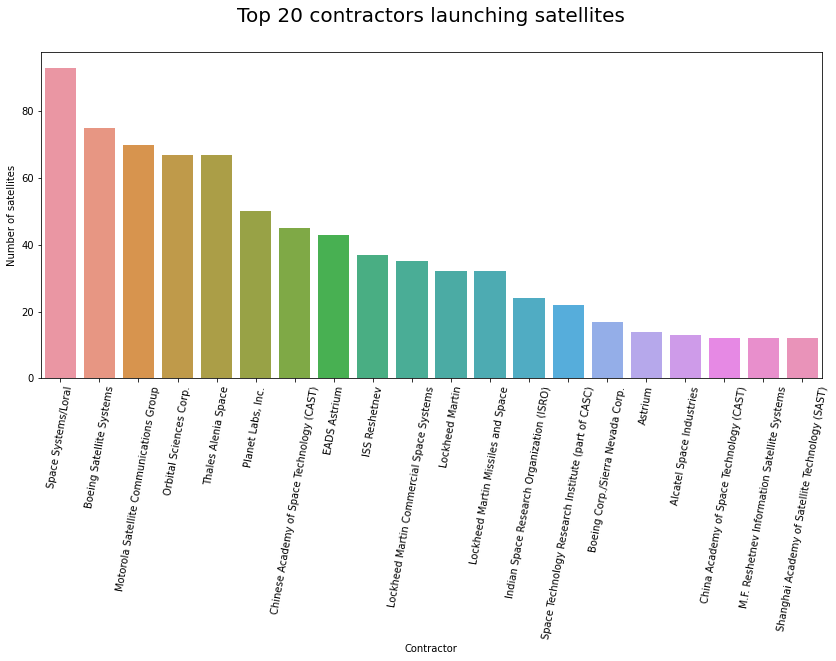

In [53]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(sat['Contractor'], order = sat.Contractor.value_counts().iloc[:20].index)
plt.xticks(rotation=80)
plt.title("Top 20 contractors launching satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Contractor")
plt.ylabel("Number of satellites")

In [54]:
sat.LaunchSite.describe()

count                    1419
unique                     25
top       Baikonur Cosmodrome
freq                      259
Name: LaunchSite, dtype: object

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

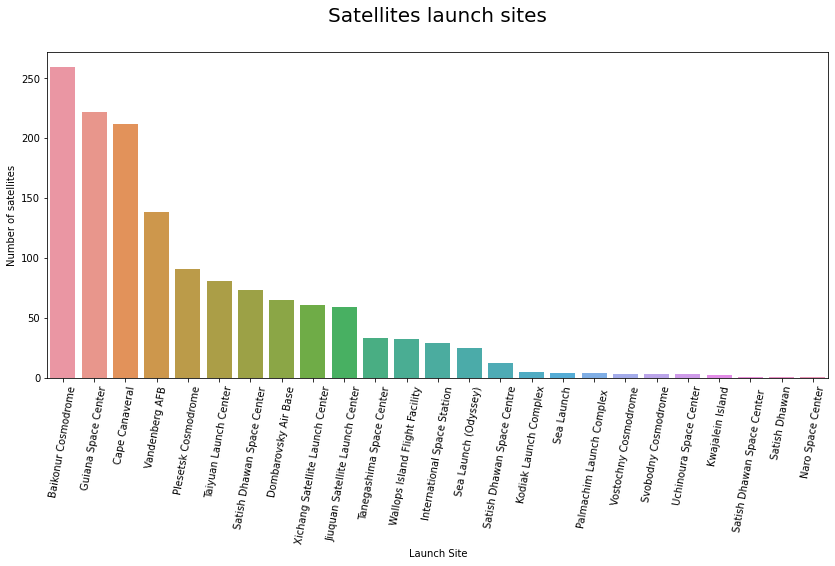

In [55]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(sat['LaunchSite'], order = sat.LaunchSite.value_counts().index)
plt.xticks(rotation=80)
plt.title("Satellites launch sites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Launch Site")
plt.ylabel("Number of satellites")

### Bivariate data analysis
**Predicting expected lifetime of satellites**

In this section we investigate the relationship between various variables and the 'Expected Lifetime' variable. We try to establish which variables seem to have a strong relationship with the expected lifetime of a satellite. The goal is to identify the variables that will be usable in our eventual model

Text(0.5, 1.0, 'Heatmap of correlations')

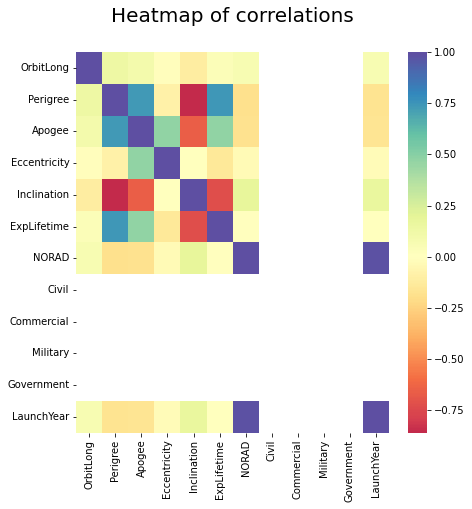

In [56]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(sat.corr(), cmap = 'Spectral', center = 0)
plt.title("Heatmap of correlations", fontdict = {'fontsize':20}, pad = 30.0)

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Expected lifetime')

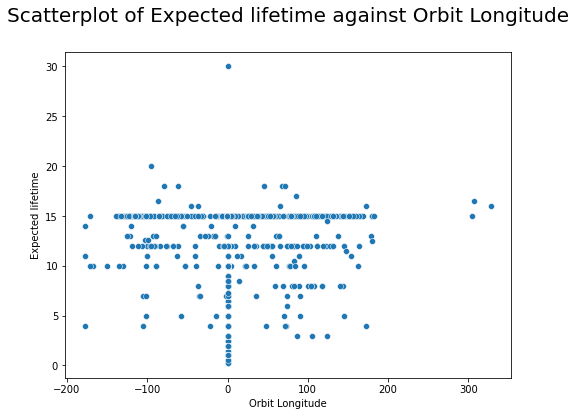

In [57]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(sat.OrbitLong, sat.ExpLifetime)
plt.title("Scatterplot of Expected lifetime against Orbit Longitude", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Orbit Longitude")
plt.ylabel("Expected lifetime")

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Expected lifetime')

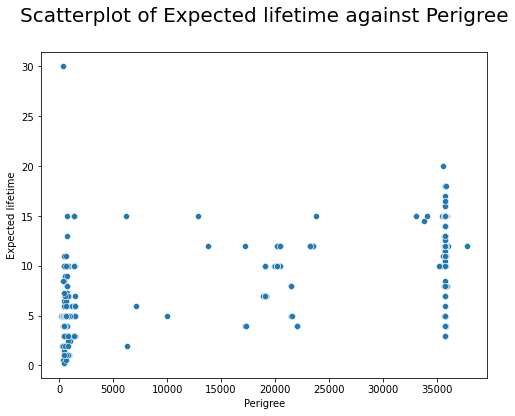

In [58]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(sat.Perigree, sat.ExpLifetime)
plt.title("Scatterplot of Expected lifetime against Perigree", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Perigree")
plt.ylabel("Expected lifetime")

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Expected lifetime')

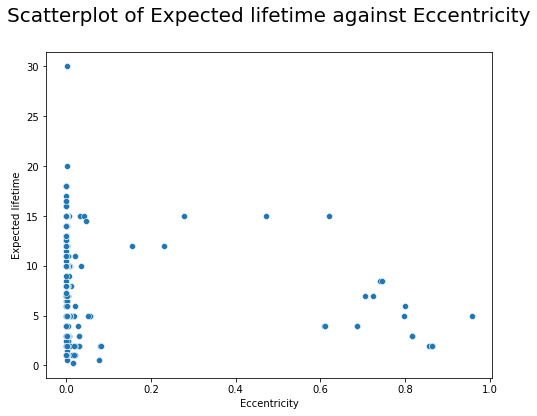

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(sat.Eccentricity, sat.ExpLifetime)
plt.title("Scatterplot of Expected lifetime against Eccentricity", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Eccentricity")
plt.ylabel("Expected lifetime")

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Expected lifetime')

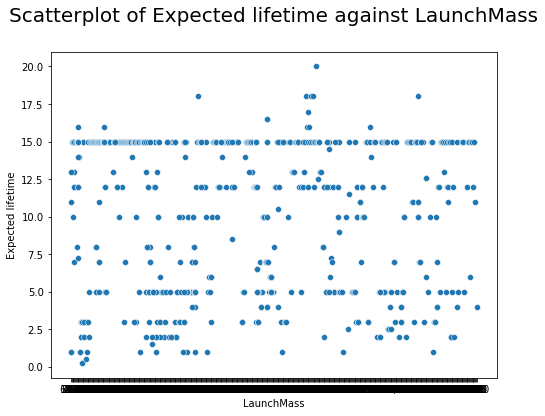

In [60]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(sat.LaunchMass, sat.ExpLifetime)
plt.title("Scatterplot of Expected lifetime against LaunchMass", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("LaunchMass")
plt.ylabel("Expected lifetime")

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Expected lifetime')

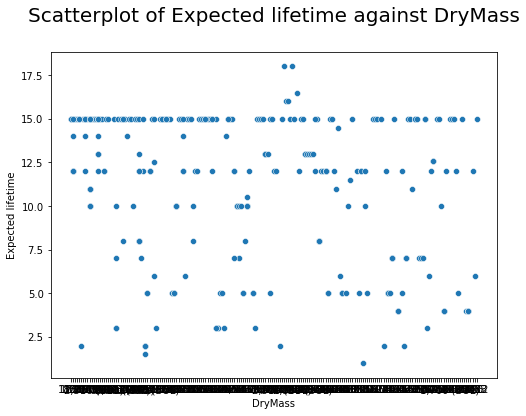

In [61]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(sat.DryMass, sat.ExpLifetime)
plt.title("Scatterplot of Expected lifetime against DryMass", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("DryMass")
plt.ylabel("Expected lifetime")

Text(0, 0.5, 'Expected lifetime')

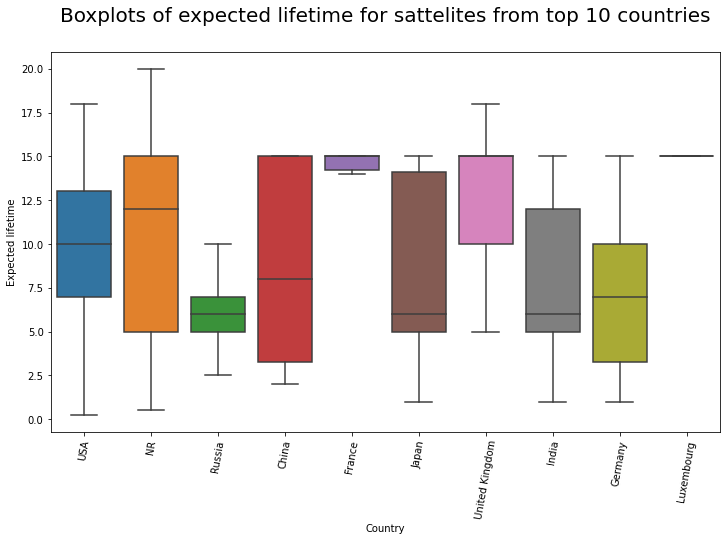

In [62]:
fig, ax = plt.subplots(figsize=(12,7))
topCountries = sat.Country.value_counts().head(10).index.tolist()
sns.boxplot(x=sat[sat['Country'].isin(topCountries)].Country, y=sat.ExpLifetime, order = topCountries, showfliers=False)
plt.xticks(rotation=80)
plt.title("Boxplots of expected lifetime for sattelites from top 10 countries",
          fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Country")
plt.ylabel("Expected lifetime")

Text(0, 0.5, 'Expected lifetime')

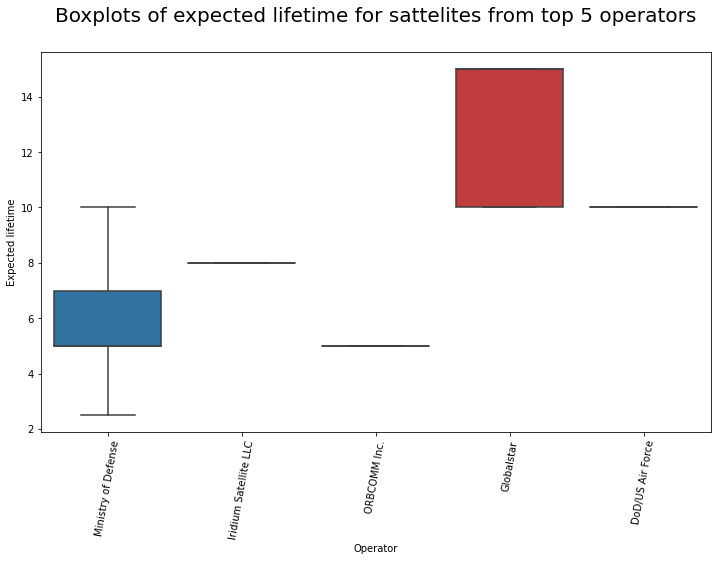

In [63]:
fig, ax = plt.subplots(figsize=(12,7))
topOperators = sat[sat['ExpLifetime'].notnull()].Operator.value_counts().head(5).index.tolist()
sns.boxplot(x=sat[((sat['Operator'].isin(topOperators)) & (sat['ExpLifetime'].notnull()))].Operator,
            y=sat.ExpLifetime, order = topOperators, showfliers=False)
plt.xticks(rotation=80)
plt.title("Boxplots of expected lifetime for sattelites from top 5 operators",
          fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Operator")
plt.ylabel("Expected lifetime")

Text(0, 0.5, 'Expected lifetime')

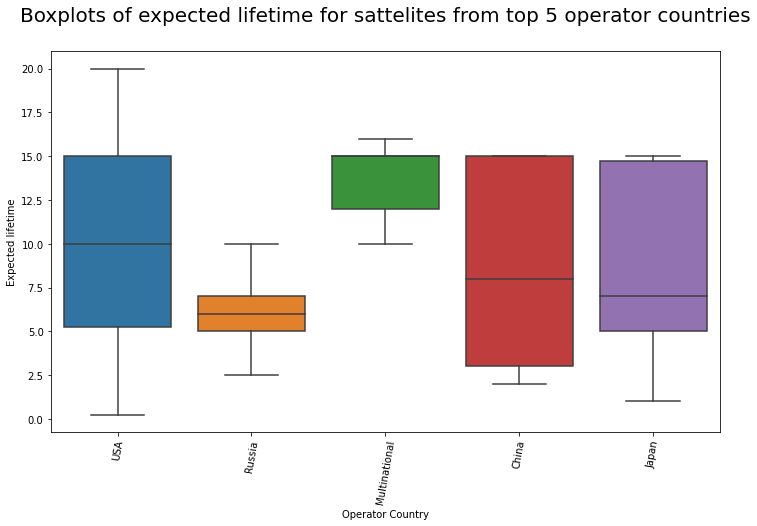

In [64]:
fig, ax = plt.subplots(figsize=(12,7))
topOperatorCountries = sat[sat['ExpLifetime'].notnull()].OperatorCountry.value_counts().head(5).index.tolist()
sns.boxplot(x=sat[((sat['OperatorCountry'].isin(topOperatorCountries)) & (sat['ExpLifetime'].notnull()))].OperatorCountry,
            y=sat.ExpLifetime, order = topOperatorCountries, showfliers=False)
plt.xticks(rotation=80)
plt.title("Boxplots of expected lifetime for sattelites from top 5 operator countries",
          fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Operator Country")
plt.ylabel("Expected lifetime")

Text(0, 0.5, 'Expected lifetime')

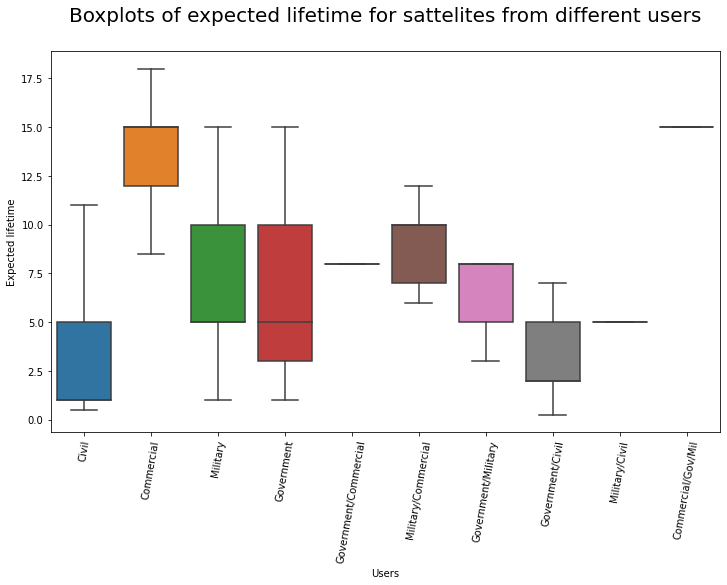

In [65]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(x=sat.Users, y=sat.ExpLifetime, showfliers=False)
plt.xticks(rotation=80)
plt.title("Boxplots of expected lifetime for sattelites from different users",
          fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Users")
plt.ylabel("Expected lifetime")

Text(0.5, 0, 'Year')

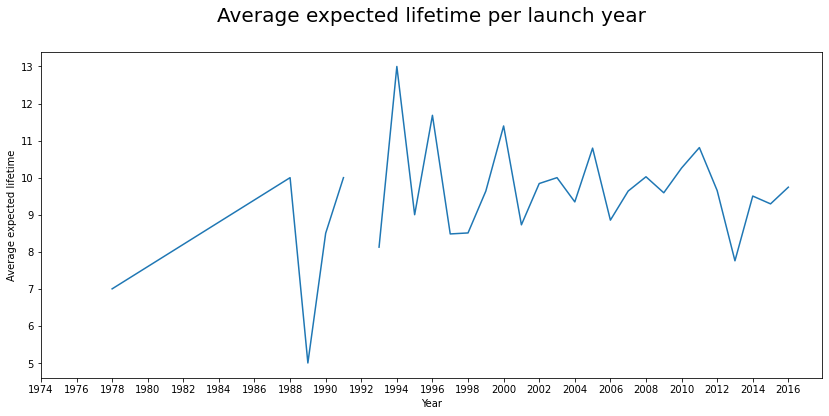

In [70]:
fig, ax = plt.subplots(figsize=(14,6))
sat[sat['LaunchDate'].notnull()].ExpLifetime.groupby(sat['LaunchDate'].dt.year).mean().plot()
plt.xticks(np.arange(1974,2017,step=2))
plt.title("Average expected lifetime per launch year", fontdict = {'fontsize':20}, pad = 30.0)
plt.ylabel("Average expected lifetime")
plt.xlabel("Year")

Text(0, 0.5, 'Expected lifetime')

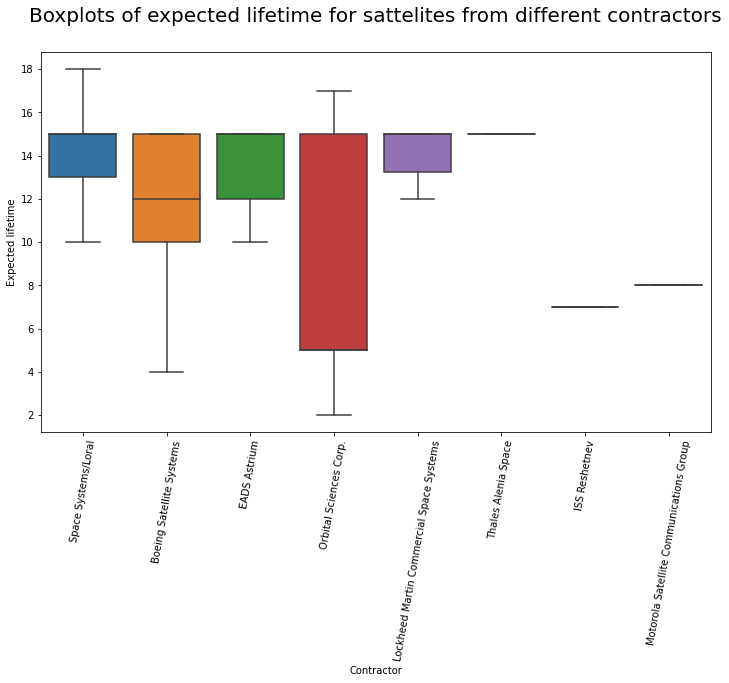

In [71]:
fig, ax = plt.subplots(figsize=(12,7))
topContractors = sat[sat['ExpLifetime'].notnull()].Contractor.value_counts().head(8).index.tolist()
sns.boxplot(x=sat[((sat['Contractor'].isin(topContractors)) & (sat['ExpLifetime'].notnull()))].Contractor,
            y=sat.ExpLifetime, showfliers=False)
plt.xticks(rotation=80)
plt.title("Boxplots of expected lifetime for sattelites from different contractors",
          fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Contractor")
plt.ylabel("Expected lifetime")

### Predictive analytics: Predicting expected lifetime
In the final part of the analysis we build a model to predict the expected lifetime of a satellite, using a `linear regression model`. The variables selected as independent variables (features) for the model are:

1. Perigree
2. Inclination
3. Launch Mass
4. Dummy variable for the use of the satellite
4. Dummy variable for the purpose of the satellite

In [72]:
from sklearn.linear_model import LinearRegression

In [77]:
features = ['Perigree','Inclination','LaunchMass','Commercial','Government','Military','Civil',
            ]

feat = sat[features]
target = sat['ExpLifetime']

In [79]:
nan_rows = np.where(np.asanyarray((feat)))[0].tolist()
feat = feat.drop(nan_rows).reset_index(drop=True)
target = target.drop(nan_rows).reset_index(drop=True)

In [80]:
nan_y_rows = np.where(np.asanyarray(np.isnan(target)))[0].tolist()
feat = feat.drop(nan_y_rows).reset_index(drop=True)
target = target.drop(nan_y_rows).reset_index(drop=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feat,target,test_size = 0.33)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
lr.score(X_test,y_test)
